In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fourier-decomposition-method/fdm.py
/kaggle/input/ibib-dataset-data/h09.edf
/kaggle/input/ibib-dataset-data/h07.edf
/kaggle/input/ibib-dataset-data/s10.edf
/kaggle/input/ibib-dataset-data/s08.edf
/kaggle/input/ibib-dataset-data/s06.edf
/kaggle/input/ibib-dataset-data/h04.edf
/kaggle/input/ibib-dataset-data/h01.edf
/kaggle/input/ibib-dataset-data/s01.edf
/kaggle/input/ibib-dataset-data/h13.edf
/kaggle/input/ibib-dataset-data/s09.edf
/kaggle/input/ibib-dataset-data/s05.edf
/kaggle/input/ibib-dataset-data/h10.edf
/kaggle/input/ibib-dataset-data/s02.edf
/kaggle/input/ibib-dataset-data/s07.edf
/kaggle/input/ibib-dataset-data/s14.edf
/kaggle/input/ibib-dataset-data/s13.edf
/kaggle/input/ibib-dataset-data/h14.edf
/kaggle/input/ibib-dataset-data/s04.edf
/kaggle/input/ibib-dataset-data/h12.edf
/kaggle/input/ibib-dataset-data/h05.edf
/kaggle/input/ibib-dataset-data/h03.edf
/kaggle/input/ibib-dataset-data/s11.edf
/kaggle/input/ibib-dataset-data/h02.edf
/kaggle/input/ibib-dataset-dat

In [2]:
!pip install kymatio
!pip install livelossplot
!pip install pyEDFlib
!pip install mne
!pip install pywt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 2.9 MB/s eta 0:00:00
  Obtaining dependency information for configparser from https://files.pythonhosted.org/packages/81/a3/0e5ed11da4b7770c15f6f319abf053f46b5a06c7d4273c48469b7899bd89/configparser-6.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for pyEDFlib from https://files.pythonhosted.org/packages/d1/bc/ae0bb62a8f68c58b7c5ff1ea4a7ad1fd6649fcac06b5eba646e0aae9bf9d/pyEDFlib-0.1.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.8 MB/s eta 0:00:00a 0:00:01
ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from kymatio.keras import Scattering2D
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
sf = 250
sec = 2


In [5]:
# !pip install pyEDFlib
# !pip install mne
# !pip install pywt
import numpy as np
import mne
import glob
import matplotlib.pyplot as plt

SZ_Data = []

# labels=[]

path='/kaggle/input/ibib-dataset-data'
files = glob.glob(path + "/h*.edf")
for filename in files:
    data = mne.io.read_raw_edf(filename)
    raw_data = data.get_data()
    SZ_Data.append(raw_data)
  # labels.append(1)

print(len(SZ_Data))

for i in range(len(SZ_Data)):
    print(np.array(SZ_Data[i]).shape)
print( np.array(SZ_Data[1]).shape)

"""**normalise**"""

SZ_Data[0]

normalise_SZ_data=[]
for i in  range(len(SZ_Data)):
    std=np.std(SZ_Data[i],axis=1)
    mean=np.mean(SZ_Data[i],axis=1)
    SZ_Data[i]=(SZ_Data[i].transpose()-mean.transpose()).transpose()
    SZ_Data[i]=(SZ_Data[i].transpose()/std.transpose()).transpose()
    normalise_SZ_data.append(SZ_Data[i])

normalise_SZ_data[3]

"""**windowing**"""

winSize= sf*sec   # Size of data point (data of 8 sec)
stride= sf*sec  # sliding window with length winSize and stride 1 sec
count=0
windowing_SZ_data=[]
for sample in normalise_SZ_data:
    for i in range(0,np.shape(sample)[1]-winSize,stride):
        count+=1
        windowing_SZ_data.append(sample[:,i:i+winSize])
# for i in range(0,np.shape(normalise_SZ_data[3])[1]-winSize,stride):
#   count+=1
#   if len(np.shape(windowing_SZ_data))>1:
#     windowing_SZ_data=np.dstack((windowing_SZ_data,normalise_SZ_data[3][:,i:i+winSize]))
#   else:
#     windowing_SZ_data=np.reshape(normalise_SZ_data[3][:,i:i+winSize],(19,np.shape(normalise_SZ_data[3][:,i:i+winSize])[1],1))

print(count)
windowing_SZ_data = np.array(windowing_SZ_data)
the_shape = np.array(windowing_SZ_data).shape
the_shape


Extracting EDF parameters from /kaggle/input/ibib-dataset-data/h09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/ibib-dataset-data/h07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/ibib-dataset-data/h04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/ibib-dataset-data/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/ibib-dataset-data/h13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/ibib-dataset-data/h10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/ibib-dataset-

(6505, 19, 500)

In [6]:
container = windowing_SZ_data
labels = [0 for i in range(the_shape[0])]

In [7]:
SZ_Data = []

# labels=[]

path='/kaggle/input/ibib-dataset-data'
files = glob.glob(path + "/s*.edf")
for filename in files:
    data = mne.io.read_raw_edf(filename)
    raw_data = data.get_data()
    SZ_Data.append(raw_data)
  # labels.append(1)

print(len(SZ_Data))

for i in range(len(SZ_Data)):
    print(np.array(SZ_Data[i]).shape)
print( np.array(SZ_Data[1]).shape)

"""**normalise**"""

SZ_Data[0]

normalise_SZ_data=[]
for i in  range(len(SZ_Data)):
    std=np.std(SZ_Data[i],axis=1)
    mean=np.mean(SZ_Data[i],axis=1)
    SZ_Data[i]=(SZ_Data[i].transpose()-mean.transpose()).transpose()
    SZ_Data[i]=(SZ_Data[i].transpose()/std.transpose()).transpose()
    normalise_SZ_data.append(SZ_Data[i])

normalise_SZ_data[3]

"""**windowing**"""

winSize= sf*sec # Size of data point (data of 8 sec)
stride= sf*sec # sliding window with length winSize and stride 1 sec
count=0
windowing_SZ_data=[]
for sample in normalise_SZ_data:
    for i in range(0,np.shape(sample)[1]-winSize,stride):
        count+=1
        windowing_SZ_data.append(sample[:,i:i+winSize])
# for i in range(0,np.shape(normalise_SZ_data[3])[1]-winSize,stride):
#   count+=1
#   if len(np.shape(windowing_SZ_data))>1:
#     windowing_SZ_data=np.dstack((windowing_SZ_data,normalise_SZ_data[3][:,i:i+winSize]))
#   else:
#     windowing_SZ_data=np.reshape(normalise_SZ_data[3][:,i:i+winSize],(19,np.shape(normalise_SZ_data[3][:,i:i+winSize])[1],1))

print(count)
windowing_SZ_data = np.array(windowing_SZ_data)
the_shape = np.array(windowing_SZ_data).shape
the_shape

Extracting EDF parameters from /kaggle/input/ibib-dataset-data/s10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/ibib-dataset-data/s08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/ibib-dataset-data/s06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/ibib-dataset-data/s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/ibib-dataset-data/s09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/ibib-dataset-data/s05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/ibib-dataset-

(7906, 19, 500)

In [8]:
labels = labels + [1 for i in range(the_shape[0])]
container = np.concatenate((container, np.array(windowing_SZ_data)))

In [9]:
labels = np.array(labels)
labels.shape

(14411,)

In [10]:
sample = container[0,0,:]

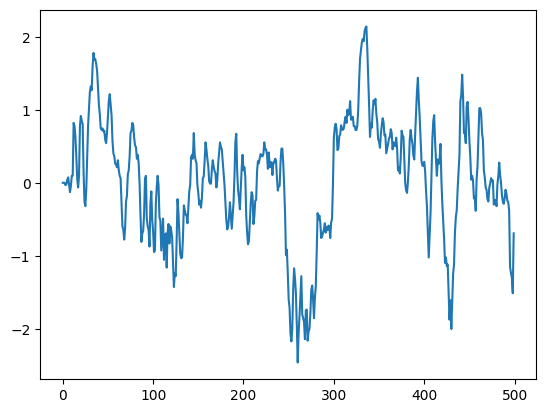

In [11]:
import matplotlib.pyplot as plt
plt.plot(sample)

In [12]:
import sys
sys.path.insert(1,'/kaggle/input/fourier-decomposition-method')
from fdm import fdm

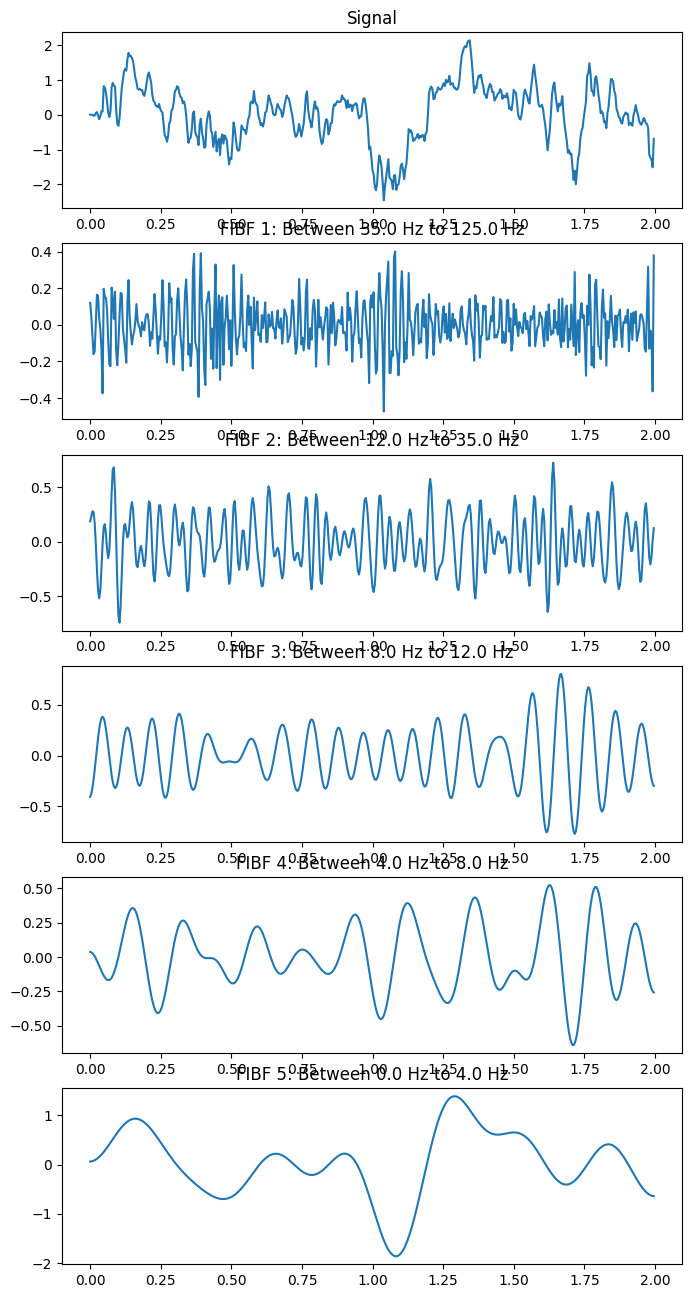

In [13]:
# from fdm import fdm
FIBFs = fdm(sample.reshape(sf*sec,1), fs = sf , fc = np.array([4,8,12,35]), data_type='columns')

In [14]:
data = []
for i in range(container.shape[0]):
    gamma,beta,alpha,theta,delta = [],[],[],[],[]
    for j in range(19):
        curr = fdm(container[i,j,:].reshape(sf*sec,1), fs = sf , fc = np.array([4,8,12,35]), data_type='columns',plot_subbands= False)
        gamma.append(curr[:,0])
        beta.append(curr[:,1])
        alpha.append(curr[:,2])
        theta.append(curr[:,3])
        delta.append(curr[:,4])
    data.append(np.array([gamma,beta,alpha,theta,delta]))
data = np.array(data)

In [15]:

x_train,x_test,y_train,y_test = train_test_split(np.array(data),np.array(labels),test_size=0.2,random_state=42)
y_train = y_train.astype('double')
y_test = y_test.astype('double')

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")
# x_train, x_test = x_train / 255., x_test / 255.

x_train shape: (11528, 5, 19, 500) - y_train shape: (11528,)
x_test shape: (2883, 5, 19, 500) - y_test shape: (2883,)


In [16]:
from keras import layers , models
import keras    
from keras import regularizers
def DenseNet(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.relu,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5))(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        #Creates a sequence of numbers that begins at start and extends by increments of delta up to but not including limit.
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [17]:
def build_model(head_size=256,num_heads=4,ff_dim=4,num_transformer_blocks=4,mlp_units=[128],mlp_dropout=0.4,dropout=0.25):
    inputs = layers.Input(shape=(5,19,sf*sec))
    
    # encoded_patches = PatchEncoder(25, 128)(patches)
    x = None
    y1 = Scattering2D(J=2, L=4)(inputs[:,0,:,:])
    y1 = PatchEncoder(y1.shape[1], 128)(tf.reshape(y1,[-1,y1.shape[1],y1.shape[2]*y1.shape[3]]))
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(y1, head_size, num_heads, ff_dim, dropout)
    representation1 = layers.LayerNormalization(epsilon=1e-6)(x)
    representation1 = layers.Flatten()(representation1)
    features1 = DenseNet(representation1, hidden_units=[1024,128], dropout_rate=0.5)

    y2 = Scattering2D(J=2, L=4)(inputs[:,1,:,:])
    y2 = PatchEncoder(y2.shape[1], 128)(tf.reshape(y2,[-1,y2.shape[1],y2.shape[2]*y2.shape[3]]))
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(y2, head_size, num_heads, ff_dim, dropout)
    representation2 = layers.LayerNormalization(epsilon=1e-6)(x)
    representation2 = layers.Flatten()(representation2)
    features2 = DenseNet(representation2, hidden_units=[1024,128], dropout_rate=0.5)

    y3 = Scattering2D(J=2, L=4)(inputs[:,2,:,:])
    y3 = PatchEncoder(y3.shape[1], 128)(tf.reshape(y3,[-1,y3.shape[1],y3.shape[2]*y3.shape[3]]))
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(y3, head_size, num_heads, ff_dim, dropout)
    representation3 = layers.LayerNormalization(epsilon=1e-6)(x)
    representation3 = layers.Flatten()(representation3)
    features3 = DenseNet(representation3, hidden_units=[1024,128], dropout_rate=0.5)

    y4 = Scattering2D(J=2, L=4)(inputs[:,3,:,:])
    y4 = PatchEncoder(y4.shape[1], 128)(tf.reshape(y4,[-1,y4.shape[1],y4.shape[2]*y4.shape[3]]))
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(y4, head_size, num_heads, ff_dim, dropout)
    representation4 = layers.LayerNormalization(epsilon=1e-6)(x)
    representation4 = layers.Flatten()(representation4)
    features4 = DenseNet(representation4, hidden_units=[1024,128], dropout_rate=0.5)

    y5 = Scattering2D(J=2, L=4)(inputs[:,4,:,:])
    y5 = PatchEncoder(y5.shape[1], 128)(tf.reshape(y5,[-1,y5.shape[1],y5.shape[2]*y5.shape[3]]))
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(y5, head_size, num_heads, ff_dim, dropout)
    representation5 = layers.LayerNormalization(epsilon=1e-6)(x)
    representation5 = layers.Flatten()(representation5)
    features5 = DenseNet(representation5, hidden_units=[1024,128], dropout_rate=0.5)

    features = tf.concat([features1,features2,features3,features4,features5],axis=1)
    # features5 = DenseNet(features, hidden_units=[128,64], dropout_rate=0)
    logits = layers.Dense(1, activation = 'sigmoid')(features)
   
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [18]:
model = build_model(
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["binary_accuracy"],
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 5, 19, 500)]         0         []                            
                                                                                                  
 tf.__operators__.getitem (  (None, 19, 500)              0         ['input_1[0][0]']             
 SlicingOpLambda)                                                                                 
                                                                                                  
 tf.__operators__.getitem_1  (None, 19, 500)              0         ['input_1[0][0]']             
  (SlicingOpLambda)                                                                               
                                                                                              

In [19]:
!pip install livelossplot

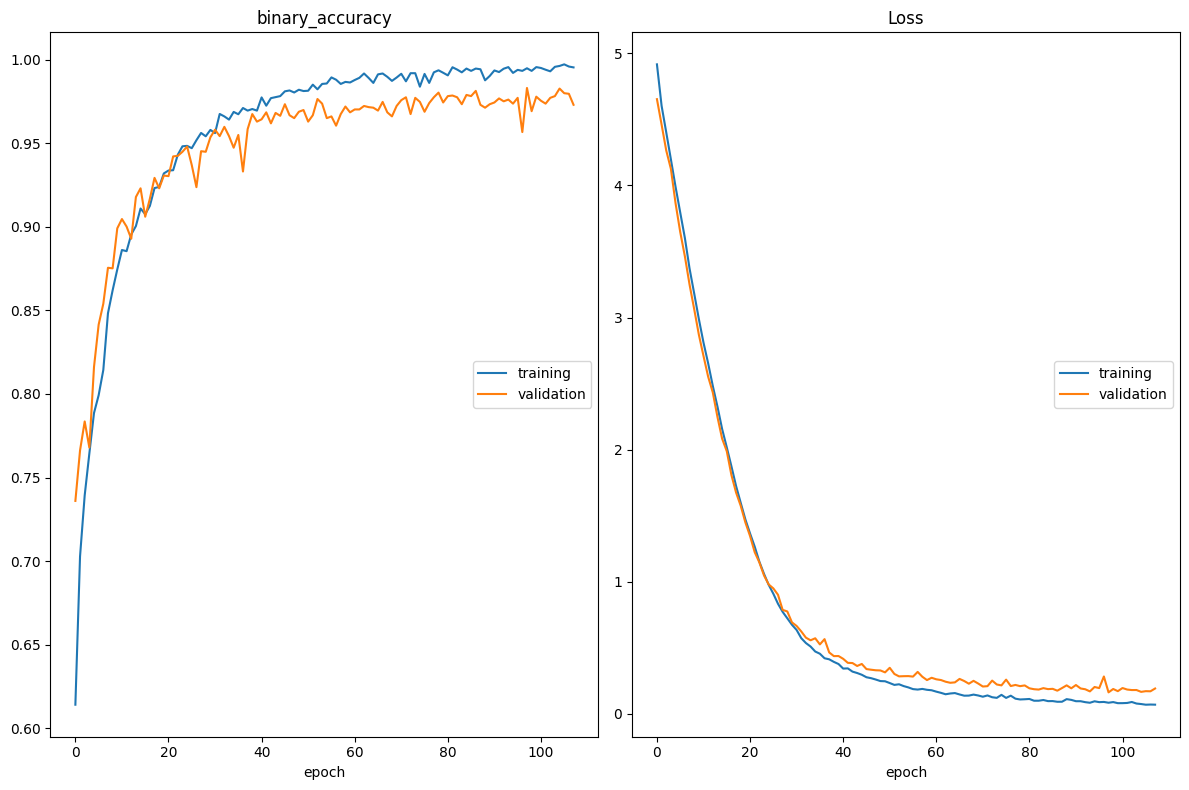

binary_accuracy
	training         	 (min:    0.614, max:    0.997, cur:    0.995)
	validation       	 (min:    0.736, max:    0.983, cur:    0.973)
Loss
	training         	 (min:    0.069, max:    4.917, cur:    0.069)
	validation       	 (min:    0.162, max:    4.653, cur:    0.191)
181/181 [==============================] - 29s 160ms/step - loss: 0.0691 - binary_accuracy: 0.9953 - val_loss: 0.1914 - val_binary_accuracy: 0.9729


In [20]:
from livelossplot import PlotLossesKeras
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),PlotLossesKeras()]

history = model.fit(
    x_train,
    y_train,
    epochs=150,
    batch_size=64,
    callbacks=callbacks,
    validation_data=(x_test,y_test)
)

Text(0.5, 1.0, 'Loss Plot')

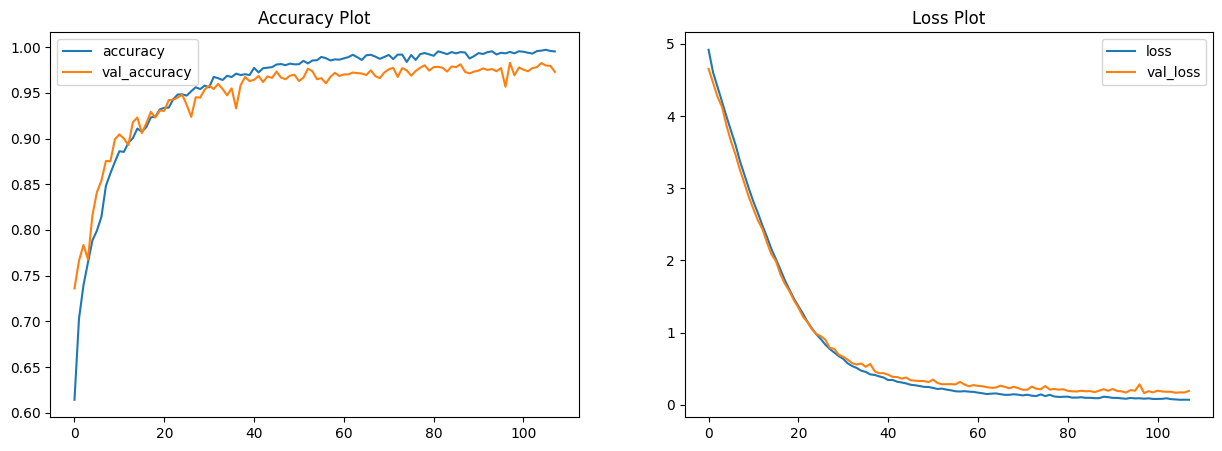

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy Plot')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss Plot')

91/91 [==============================] - 13s 56ms/step


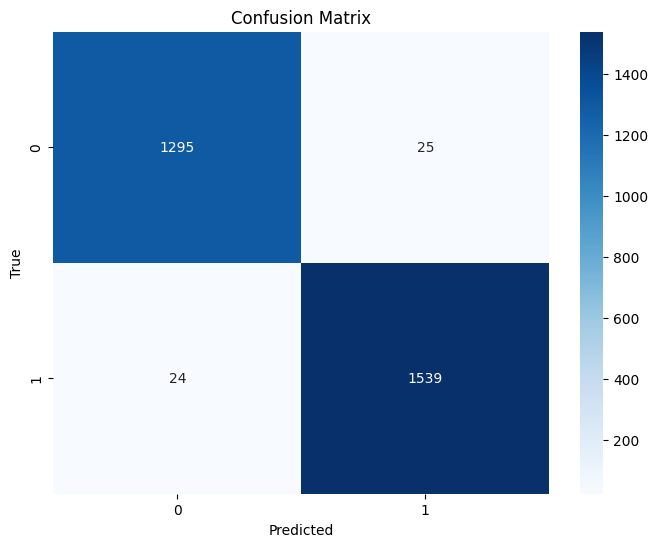

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, model.predict(x_test).round())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [24]:
precision = (cm[1][1]/(cm[1][1]+cm[0][1]))*100
print(f'Precision = {precision}%')

recall = (cm[1][1]/(cm[1][1]+cm[1][0]))*100
print(f'Recall = {recall}%')

f1_score = (2*precision*recall)/(precision+recall)
print(f'F1 Score = {f1_score}%')


Precision = 98.40153452685422%
Recall = 98.46449136276392%
F1 Score = 98.43300287815799%
